In [15]:
import pandas as pd
df = pd.read_csv(r"D:\ds\data preprocessing\data\waves.csv")


In [16]:
df.head()

,SOURCE_ID,WAVE_ID,YEAR,MONTH,DAY,REGION_CODE,COUNTRY,STATE/PROVINCE,LOCATION,LATITUDE,...,INJURIES,INJURY_ESTIMATE,FATALITIES,FATALITY_ESTIMATE,DAMAGE_MILLIONS_DOLLARS,DAMAGE_ESTIMATE,HOUSES_DAMAGED,HOUSE_DAMAGE_ESTIMATE,HOUSES_DESTROYED,HOUSE_DESTRUCTION_ESTIMATE
0,1,11014,-2000,NaN,NaN,50.0,SYRIA,NaN,UGARIT,35.583,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
1,3,17601,-1610,NaN,NaN,50.0,SYRIA,NaN,UGARIT,35.583,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
2,3,1,-1610,NaN,NaN,50.0,GREECE,NaN,N. AND E. COAST CRETE,35.500,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
3,9,2,-479,NaN,NaN,50.0,GREECE,NaN,"POTIDAEA, MACEDONIA",40.300,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,10,19364,-426,6.0,NaN,50.0,GREECE,NaN,TARFI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# we will predict the height of the wave based on the given attributes

In [18]:
df.columns

Index(['SOURCE_ID', 'WAVE_ID', 'YEAR', 'MONTH', 'DAY', 'REGION_CODE',
       'COUNTRY', 'STATE/PROVINCE', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'DISTANCE_FROM_SOURCE', 'TRAVEL_TIME_HOURS', 'TRAVEL_TIME_MINUTES',
       'VALIDITY', 'MEASUREMENT_TYPE', 'PERIOD', 'FIRST_MOTION',
       'MAXIMUM_HEIGHT', 'HORIZONTAL_INUNDATION', 'INJURIES',
       'INJURY_ESTIMATE', 'FATALITIES', 'FATALITY_ESTIMATE',
       'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_ESTIMATE', 'HOUSES_DAMAGED',
       'HOUSE_DAMAGE_ESTIMATE', 'HOUSES_DESTROYED',
       'HOUSE_DESTRUCTION_ESTIMATE'],
      dtype='object')

In [19]:
nanl=df.isna().mean()*100 # columns with nan value percentage

In [20]:
# removing the columsn with more than 90% of nan values to produce more generalized model
cols =nanl[nanl <=90].index 
cols

Index(['SOURCE_ID', 'WAVE_ID', 'YEAR', 'MONTH', 'DAY', 'REGION_CODE',
       'COUNTRY', 'STATE/PROVINCE', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'DISTANCE_FROM_SOURCE', 'TRAVEL_TIME_HOURS', 'TRAVEL_TIME_MINUTES',
       'MEASUREMENT_TYPE', 'MAXIMUM_HEIGHT', 'HORIZONTAL_INUNDATION'],
      dtype='object')

In [21]:
df_n = df[cols]

In [22]:
df_n.head()

,SOURCE_ID,WAVE_ID,YEAR,MONTH,DAY,REGION_CODE,COUNTRY,STATE/PROVINCE,LOCATION,LATITUDE,LONGITUDE,DISTANCE_FROM_SOURCE,TRAVEL_TIME_HOURS,TRAVEL_TIME_MINUTES,MEASUREMENT_TYPE,MAXIMUM_HEIGHT,HORIZONTAL_INUNDATION
0,1,11014,-2000,NaN,NaN,50.0,SYRIA,NaN,UGARIT,35.583,35.75,12.0,NaN,NaN,1.0,NaN,NaN
1,3,17601,-1610,NaN,NaN,50.0,SYRIA,NaN,UGARIT,35.583,35.75,935.0,NaN,NaN,1.0,NaN,NaN
2,3,1,-1610,NaN,NaN,50.0,GREECE,NaN,N. AND E. COAST CRETE,35.500,25.00,106.0,NaN,NaN,1.0,NaN,NaN
3,9,2,-479,NaN,NaN,50.0,GREECE,NaN,"POTIDAEA, MACEDONIA",40.300,23.33,67.0,NaN,NaN,1.0,NaN,NaN
4,10,19364,-426,6.0,NaN,50.0,GREECE,NaN,TARFI,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [23]:
nanl2=df_n.isna().mean()*100 
nanl2

SOURCE_ID                 0.000000
WAVE_ID                   0.000000
YEAR                      0.000000
MONTH                     0.396901
DAY                       0.812884
REGION_CODE               0.003816
COUNTRY                   0.011449
STATE/PROVINCE           19.833607
LOCATION                  0.019082
LATITUDE                  2.335610
LONGITUDE                 2.335610
DISTANCE_FROM_SOURCE      3.369843
TRAVEL_TIME_HOURS        87.512880
TRAVEL_TIME_MINUTES      87.608289
MEASUREMENT_TYPE          1.102927
MAXIMUM_HEIGHT           14.784567
HORIZONTAL_INUNDATION    66.450406
dtype: float64

In [24]:
coli=nanl2[nanl2 >=0.2].index  # columsn which have nan values more than 1%
coli=list(coli)
coli

['MONTH',
 'DAY',
 'STATE/PROVINCE',
 'LATITUDE',
 'LONGITUDE',
 'DISTANCE_FROM_SOURCE',
 'TRAVEL_TIME_HOURS',
 'TRAVEL_TIME_MINUTES',
 'MEASUREMENT_TYPE',
 'MAXIMUM_HEIGHT',
 'HORIZONTAL_INUNDATION']

In [25]:
coli.pop(2) # removing categorical data
coli

['MONTH',
 'DAY',
 'LATITUDE',
 'LONGITUDE',
 'DISTANCE_FROM_SOURCE',
 'TRAVEL_TIME_HOURS',
 'TRAVEL_TIME_MINUTES',
 'MEASUREMENT_TYPE',
 'MAXIMUM_HEIGHT',
 'HORIZONTAL_INUNDATION']

## checking distributions of columns

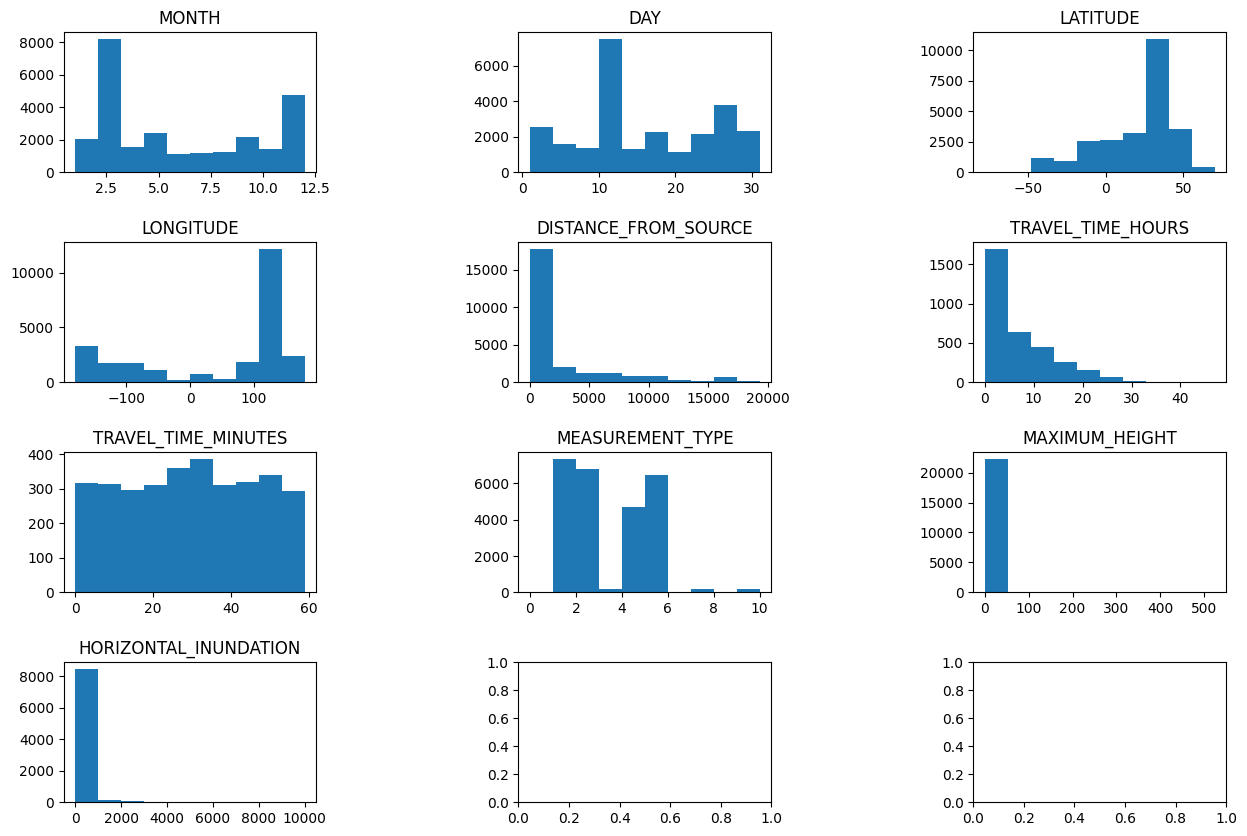

In [26]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 3, figsize=(15, 10))  # 4 row, 3 columns
k=0
for i in range(0,4):
    for j in range(0,3):
        if(i==3 and j>0):
            break
        axs[i,j].hist(df_n[coli[k]],bins=10)
        axs[i,j].set_title(coli[k])
        k+=1
plt.subplots_adjust(wspace=0.8, hspace=0.5)
plt.show()

In [27]:
# we can also check the skew of the data using skew method
# skw = df_n.skew()
# positive value indicates right skew, negative value indicates left skew and a value closer to 0 indicates less skew 
# but to do this, the whole dataset must contain numerical values

In [28]:
# as you observe the above data, 
#->TRAVEL_TIME_HOURS is right skewed
#->TRAVEL_TIME_MINUTES is somewhat normal normaldistribution
#->MAXIMUM_HEIGHT is right skewed
#->HORIZONTAL_INUNDATION is right skewed 
#->MONTH AND DAY are multimodel distribution

# for normal distribution we can replace nan with mean value
# for skewed data we can replace it with median
# for multimodal distribtution you can replace the nan values with mode

# for column STATE/PROVINCE as it contains categorical values, you can simple the nan values with mode


# replacing nan values 

In [29]:
df_n['DAY']=df_n['DAY'].fillna(df_n['DAY'].mode()[0])
df_n['MONTH']=df_n['MONTH'].fillna(df_n['MONTH'].mode()[0])
df_n['TRAVEL_TIME_HOURS']=df_n['TRAVEL_TIME_HOURS'].fillna(df_n['TRAVEL_TIME_HOURS'].median())
df_n['TRAVEL_TIME_MINUTES']=df_n['TRAVEL_TIME_MINUTES'].fillna(df_n['TRAVEL_TIME_MINUTES'].mean())
df_n['LATITUDE']=df_n['LATITUDE'].fillna(df_n['LATITUDE'].median())
df_n['LONGITUDE']=df_n['LONGITUDE'].fillna(df_n['LONGITUDE'].median())
df_n['DISTANCE_FROM_SOURCE']=df_n['DISTANCE_FROM_SOURCE'].fillna(df_n['DISTANCE_FROM_SOURCE'].median())
df_n['MEASUREMENT_TYPE']=df_n['MEASUREMENT_TYPE'].fillna(df_n['MEASUREMENT_TYPE'].mean())
df_n['MAXIMUM_HEIGHT']=df_n['MAXIMUM_HEIGHT'].fillna(df_n['MAXIMUM_HEIGHT'].median())
df_n['HORIZONTAL_INUNDATION']=df_n['HORIZONTAL_INUNDATION'].fillna(df_n['HORIZONTAL_INUNDATION'].median())
df_n['STATE/PROVINCE']=df_n['STATE/PROVINCE'].fillna(df_n['STATE/PROVINCE'].mode()[0])

C:\Users\vivek\AppData\Local\Temp\ipykernel_21560\2613520030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['DAY']=df_n['DAY'].fillna(df_n['DAY'].mode()[0])
C:\Users\vivek\AppData\Local\Temp\ipykernel_21560\2613520030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['MONTH']=df_n['MONTH'].fillna(df_n['MONTH'].mode()[0])
C:\Users\vivek\AppData\Local\Temp\ipykernel_21560\2613520030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [30]:
df_n.isna().mean()*100

SOURCE_ID                0.000000
WAVE_ID                  0.000000
YEAR                     0.000000
MONTH                    0.000000
DAY                      0.000000
REGION_CODE              0.003816
COUNTRY                  0.011449
STATE/PROVINCE           0.000000
LOCATION                 0.019082
LATITUDE                 0.000000
LONGITUDE                0.000000
DISTANCE_FROM_SOURCE     0.000000
TRAVEL_TIME_HOURS        0.000000
TRAVEL_TIME_MINUTES      0.000000
MEASUREMENT_TYPE         0.000000
MAXIMUM_HEIGHT           0.000000
HORIZONTAL_INUNDATION    0.000000
dtype: float64

In [31]:
df_n.shape

(26203, 17)

In [32]:
(26203*0.01)/100

2.6203000000000003

In [33]:
df_n.head()

,SOURCE_ID,WAVE_ID,YEAR,MONTH,DAY,REGION_CODE,COUNTRY,STATE/PROVINCE,LOCATION,LATITUDE,LONGITUDE,DISTANCE_FROM_SOURCE,TRAVEL_TIME_HOURS,TRAVEL_TIME_MINUTES,MEASUREMENT_TYPE,MAXIMUM_HEIGHT,HORIZONTAL_INUNDATION
0,1,11014,-2000,3.0,11.0,50.0,SYRIA,MIYAGI,UGARIT,35.583,35.75,12.0,4.0,29.21158,1.0,2.3,32.0
1,3,17601,-1610,3.0,11.0,50.0,SYRIA,MIYAGI,UGARIT,35.583,35.75,935.0,4.0,29.21158,1.0,2.3,32.0
2,3,1,-1610,3.0,11.0,50.0,GREECE,MIYAGI,N. AND E. COAST CRETE,35.500,25.00,106.0,4.0,29.21158,1.0,2.3,32.0
3,9,2,-479,3.0,11.0,50.0,GREECE,MIYAGI,"POTIDAEA, MACEDONIA",40.300,23.33,67.0,4.0,29.21158,1.0,2.3,32.0
4,10,19364,-426,6.0,11.0,50.0,GREECE,MIYAGI,TARFI,34.500,133.25,255.0,4.0,29.21158,1.0,2.3,32.0


In [57]:
#df_n.to_csv('D:\ds\data preprocessing\data\waves_nonan.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vivek\AppData\Local\Temp\ipykernel_21560\2447348885.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_n.to_csv('D:\ds\data preprocessing\data\waves_nonan.csv')


In [ ]:
# attribute selection will done in next modal
# check the file in path D:\ds\data preprocessing\attribute_sel\temp_a.ipynb 